In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
)

In [70]:
def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])


def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.show()

In [71]:
emote_df = pd.read_csv("../datasets/train/train_emoticon.csv")
emote_df

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1
...,...,...
7075,🙯😺😻😑😣🛐😛🚼🙼🙯😣😑🚠,1
7076,🛐🚼😅🙯😣🙹😛😑😑🙼😣🚍🙯,1
7077,🛜😑🙒😛😣🙯🛐🚼🙼🙬🙯😣😑,1
7078,😣😑😛🛋🛐🙯🚼🚪🙯😑🛀😣🙼,0


Preprocessing the data into numeric form

In [72]:
# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
emote_df["characters"] = emote_df["input_emoticon"].apply(list)

# Create new columns for each character
for i in range(len(emote_df["characters"][0])):
    emote_df[f"c_{i+1}"] = emote_df["characters"].apply(
        lambda x: x[i] if len(x) > i else ""
    )
l1 = [f"c_{i+1}" for i in range(len(emote_df["characters"][0]))]
edf = emote_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, "label", emote_df["label"])
emote_df[["input_emoticon", "label"]].head(25)

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1
5,😑😣🚧😛🚜🚼🙯🛐🙼😣😑🙕🙯,1
6,😣😑🙯🚼🛐🚥😬😛😣🚄😑🙼🙯,0
7,🚡🚼😑🛐🚔🙯😛😣😑🙯🛓🙼😣,0
8,🛐😛🛜😑🚼😚😣🙯😣😑🙯🚠🙼,0
9,🙯😑🙷🛐🚼😣😛😍😿🙯🙼😑😣,1


In [73]:
edf

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,label
0,128539,128720,128571,128529,128547,128608,128623,128700,128530,128636,128529,128623,128547,0
1,128720,128529,128554,128539,128700,128623,128547,128645,128529,128623,128569,128547,128636,0
2,128539,128623,128529,128673,128547,128700,128720,128626,128547,128623,128721,128529,128636,0
3,128539,128700,128720,128592,128547,128623,128529,128618,128529,128636,128710,128547,128623,1
4,128720,128671,128700,128539,128587,128529,128547,128623,128569,128623,128529,128547,128636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,128623,128570,128571,128529,128547,128720,128539,128700,128636,128623,128547,128529,128672,1
7076,128720,128700,128517,128623,128547,128633,128539,128529,128529,128636,128547,128653,128623,1
7077,128732,128529,128594,128539,128547,128623,128720,128700,128636,128620,128623,128547,128529,1
7078,128547,128529,128539,128715,128720,128623,128700,128682,128623,128529,128704,128547,128636,0


Function block

Failed Approach : Creating a Bag-of-words of only the most significant emojis.

In [74]:
# print the n most common emotes in each category
# for col in l1:
#     print(f"Most common emotes in {col}:")
#     print(edf[col].value_counts().head(n))

# 1. bag of words method


# Take the 7 most common emotes
# print(edf[l1].apply(pd.Series.value_counts).sum(axis=1).nlargest(100).head(10))
# Create a bag of words model

# common_emotes = edf[l1].apply(pd.Series.value_counts).sum(axis=1).nlargest(7).index.tolist()
# vectorizer = CountVectorizer(vocabulary=[str(emote) for emote in common_emotes])
# emote_strings = edf[l1].apply(lambda row: ' '.join(row.astype(str)), axis=1)
# bag_of_words = vectorizer.fit_transform(emote_strings)
# Convert to DataFrame for better readability
# bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
# bow_df['label'] = edf['label']
# bow_df

# every entry has a same common set of 7 emojis shuffled around

We Create a comprehensive non-dimensionally reduced Bag of words model

In [75]:
# make a list of all the unique emotes in edf
unique_emotes = pd.unique(edf[l1].values.ravel())
unique_emotes.size

vectorizer = CountVectorizer(vocabulary=[str(emote) for emote in unique_emotes])
emote_strings = edf[l1].apply(lambda row: " ".join(row.astype(str)), axis=1)
bag_of_words = vectorizer.fit_transform(emote_strings)
# Convert to DataFrame for better readability
bow_sparse_df = pd.DataFrame(
    bag_of_words.toarray(), columns=vectorizer.get_feature_names_out()
)
bow_sparse_df["label"] = edf["label"]
bow_sparse_df.shape

bow = bow_sparse_df.to_numpy()

X_bow = bow[:, :-1]
y_bow = bow[:, -1]

## LOGISTIC REGRESSION 
on non-dimensionally reduced bag of words model

              precision    recall  f1-score   support

     Class 0       0.48      0.53      0.50       719
     Class 1       0.45      0.40      0.42       697

    accuracy                           0.46      1416
   macro avg       0.46      0.46      0.46      1416
weighted avg       0.46      0.46      0.46      1416



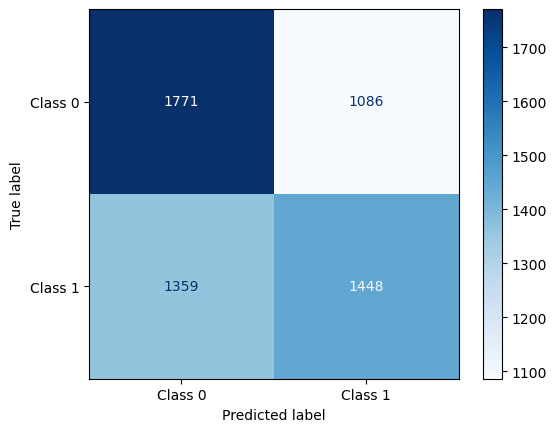

In [76]:
# Define features and target
# Perform train-test split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_bow, test_size=0.2, random_state=42
)


log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_bow, y_train_bow)

y_train_pred = log_reg.predict(X_train_bow)
y_test_pred = log_reg.predict(X_test_bow)

train_report = get_classification_report(y_train_bow, y_train_pred)
test_report = get_classification_report(y_test_bow, y_test_pred)

print(test_report)
plot_confusion_matrix(
    y_train_bow, y_train_pred, ["Class 0", "Class 1"], title="Train Confusion Matrix"
)

TF-IDF MAPPING

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=[str(emote) for emote in unique_emotes])

# Fit and transform the emote strings
tfidf_matrix = tfidf_vectorizer.fit_transform(emote_strings)

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df["label"] = edf["label"]

# Display the TF-IDF DataFrame
tfidf = tfidf_df.to_numpy()
X_tf = tfidf[:, :-1]
y_tf = tfidf[:, -1]

              precision    recall  f1-score   support

     Class 0       0.48      0.53      0.50       719
     Class 1       0.45      0.40      0.43       697

    accuracy                           0.47      1416
   macro avg       0.46      0.46      0.46      1416
weighted avg       0.46      0.47      0.46      1416



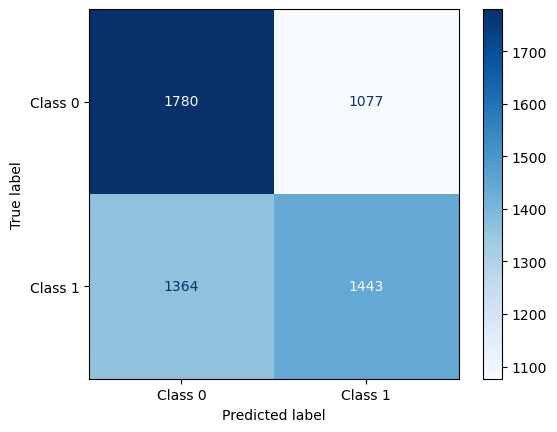

In [78]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(
    X_tf, y_tf, test_size=0.2, random_state=42
)

log_reg.fit(X_train_tf, y_train_tf)

y_train_pred_tf = log_reg.predict(X_train_tf)
y_test_pred_tf = log_reg.predict(X_test_tf)

train_report = get_classification_report(y_train_tf, y_train_pred_tf)
test_report = get_classification_report(y_test_tf, y_test_pred_tf)

print(test_report)
plot_confusion_matrix(
    y_train_tf, y_train_pred_tf, ["Class 0", "Class 1"], title="Train Confusion Matrix"
)

## SUPPORT VECTOR MACHINE

on Bag of words

Train Classification Report for SVM on :
               precision    recall  f1-score   support

     Class 0       0.56      0.65      0.60      2857
     Class 1       0.57      0.48      0.52      2807

    accuracy                           0.56      5664
   macro avg       0.56      0.56      0.56      5664
weighted avg       0.56      0.56      0.56      5664

Test Classification Report for SVM:
               precision    recall  f1-score   support

     Class 0       0.51      0.61      0.55       719
     Class 1       0.49      0.39      0.44       697

    accuracy                           0.50      1416
   macro avg       0.50      0.50      0.49      1416
weighted avg       0.50      0.50      0.49      1416



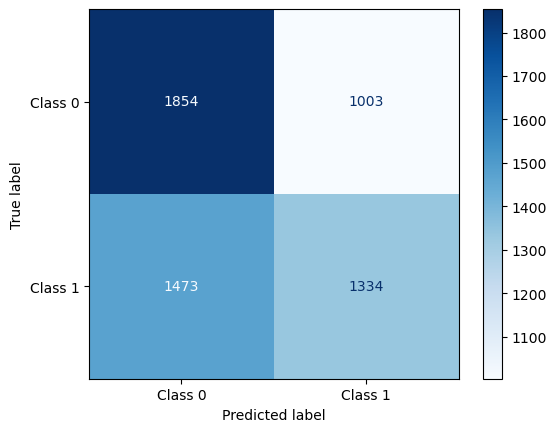

In [79]:
from sklearn.svm import SVC

# Perform train-test split

# Create and train the SVM model
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train_bow, y_train_bow)

# Make predictions
y_train_pred_svm_bow = svm_model.predict(X_train_bow)
y_test_pred_svm_bow = svm_model.predict(X_test_bow)

# Evaluate the model
train_report_svm = get_classification_report(y_train_bow, y_train_pred_svm_bow)
test_report_svm = get_classification_report(y_test_bow, y_test_pred_svm_bow)

print("Train Classification Report for SVM on :\n", train_report_svm)
print("Test Classification Report for SVM:\n", test_report_svm)
plot_confusion_matrix(
    y_train_bow,
    y_train_pred_svm_bow,
    ["Class 0", "Class 1"],
    title="Train Confusion Matrix",
)

PCA didnt work

In [80]:
# # Perform PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(edf[l1])

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1'])
# pca_df['label'] = edf['label']

# # Display the PCA DataFrame
# pca_df.to_numpy()
# X_pca = pca_df.to_numpy()[:, :-1]
# y_pca = pca_df.to_numpy()[:, -1]

# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
# log_reg.fit(X_train_pca, y_train_pca)

# y_train_pred_pca = log_reg.predict(X_train_pca)
# y_test_pred_pca = log_reg.predict(X_test_pca)

# train_report_pca = get_classification_report(y_train_pca, y_train_pred_pca)
# test_report_pca = get_classification_report(y_test_pca, y_test_pred_pca)

# print("Train Classification Report for PCA:\n", train_report_pca)
# print("Test Classification Report for PCA:\n", test_report_pca)

# plot_confusion_matrix(y_train_pca, y_train_pred_pca, ['Class 0', 'Class 1'], title='Train Confusion Matrix')

In [81]:
emo_spaced = [" ".join(x) for x in emote_df["characters"]]
sentences = emo_spaced


# Simple Tokenizer (word-to-index mapping)
class SimpleTokenizer:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.vocab_size = 0

    def fit(self, sentences):
        idx = 1  # Start index from 1 (0 is reserved for padding)
        for sentence in sentences:
            for word in sentence.split():
                if word not in self.word2idx:
                    self.word2idx[word] = idx
                    self.idx2word[idx] = word
                    idx += 1
        self.vocab_size = idx

    def texts_to_sequences(self, sentences):
        sequences = []
        for sentence in sentences:
            sequences.append([self.word2idx[word] for word in sentence.split()])
        return sequences


# Initialize tokenizer and fit on sentences
tokenizer = SimpleTokenizer()
tokenizer.fit(sentences)

# Convert sentences to sequences of indices
sequences = tokenizer.texts_to_sequences(sentences)
X_tr, X_te, y_tr, y_te = train_test_split(
    sequences, y_bow, test_size=0.2, random_state=42
)

Train Classification Report for SVM on :
               precision    recall  f1-score   support

     Class 0       0.58      0.58      0.58      2857
     Class 1       0.57      0.56      0.57      2807

    accuracy                           0.57      5664
   macro avg       0.57      0.57      0.57      5664
weighted avg       0.57      0.57      0.57      5664

Test Classification Report for SVM:
               precision    recall  f1-score   support

     Class 0       0.58      0.58      0.58       719
     Class 1       0.57      0.57      0.57       697

    accuracy                           0.57      1416
   macro avg       0.57      0.57      0.57      1416
weighted avg       0.57      0.57      0.57      1416



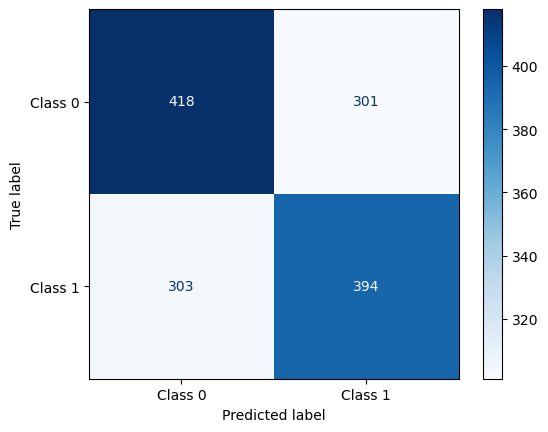

In [82]:
log_reg.fit(X_tr, y_tr)

# Make predictions
y_pr_tr = log_reg.predict(X_tr)
y_pr_te = log_reg.predict(X_te)

# Evaluate the model
train_report_svm = get_classification_report(y_tr, y_pr_tr)
test_report_svm = get_classification_report(y_te, y_pr_te)

print("Train Classification Report for SVM on :\n", train_report_svm)
print("Test Classification Report for SVM:\n", test_report_svm)
plot_confusion_matrix(
    y_te, y_pr_te, ["Class 0", "Class 1"], title="Train Confusion Matrix"
)

In [83]:
# Create one-hot encoding of the dataset
one_hot_encoded_df = pd.get_dummies(edf[l1].astype(str))

# Flatten the one-hot encoded DataFrame
one_hot_encoded_flat = one_hot_encoded_df.to_numpy().reshape(one_hot_encoded_df.shape[0], -1)

# Add the label column
one_hot_encoded_flat = np.hstack((one_hot_encoded_flat, edf[['label']].to_numpy()))

# Display the shape of the flattened one-hot encoded data
one_hot_encoded_flat
X_tr_oh, X_te_oh, y_tr_oh, y_te_oh = train_test_split(
    one_hot_encoded_flat[:, :-1], one_hot_encoded_flat[:, -1], test_size=0.2, random_state=42
)

              precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84       719
     Class 1       0.84      0.84      0.84       697

    accuracy                           0.84      1416
   macro avg       0.84      0.84      0.84      1416
weighted avg       0.84      0.84      0.84      1416



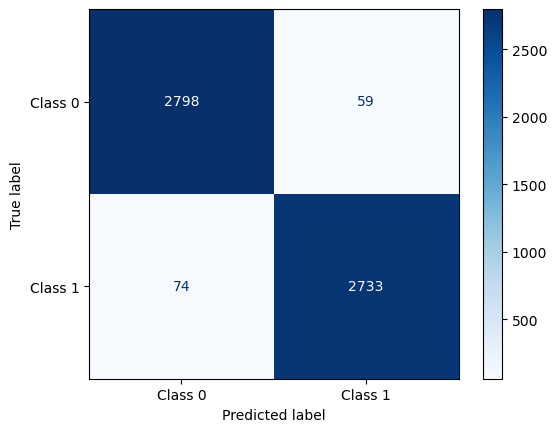

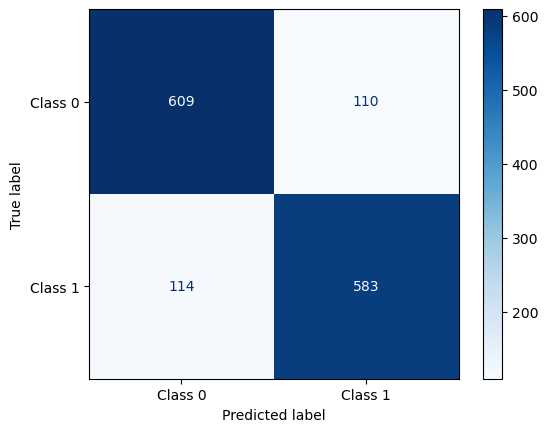

In [84]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_tr_oh, y_tr_oh)

y_tr_pred_oh = log_reg.predict(X_tr_oh)
y_te_pred_oh = log_reg.predict(X_te_oh)

train_report = get_classification_report(y_tr_oh, y_tr_pred_oh)
test_report = get_classification_report(y_te_oh, y_te_pred_oh)

print(test_report)
plot_confusion_matrix(
    y_tr_oh, y_tr_pred_oh, ["Class 0", "Class 1"], title="Train Confusion Matrix"
)
plot_confusion_matrix(
    y_te_oh, y_te_pred_oh, ["Class 0", "Class 1"], title="Test Confusion Matrix"
)

              precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84       719
     Class 1       0.84      0.84      0.84       697

    accuracy                           0.84      1416
   macro avg       0.84      0.84      0.84      1416
weighted avg       0.84      0.84      0.84      1416



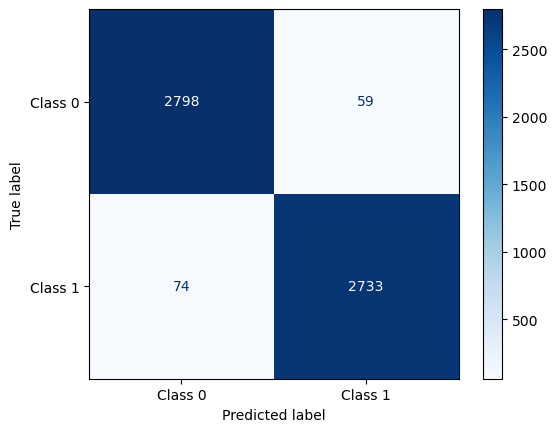

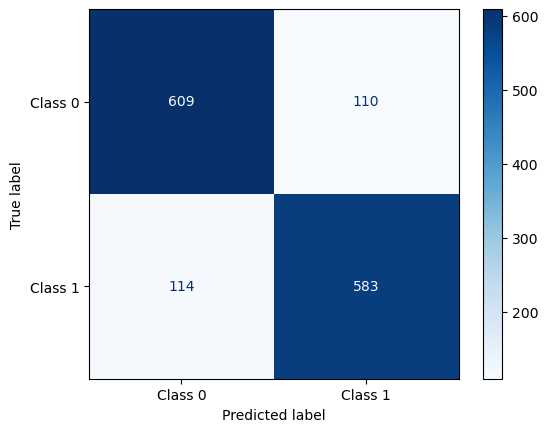

In [85]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_tr_oh, y_tr_oh)

y_tr_pred_oh = log_reg.predict(X_tr_oh)
y_te_pred_oh = log_reg.predict(X_te_oh)

train_report = get_classification_report(y_tr_oh, y_tr_pred_oh)
test_report = get_classification_report(y_te_oh, y_te_pred_oh)

print(test_report)
plot_confusion_matrix(
    y_tr_oh, y_tr_pred_oh, ["Class 0", "Class 1"], title="Train Confusion Matrix"
)
plot_confusion_matrix(
    y_te_oh, y_te_pred_oh, ["Class 0", "Class 1"], title="Test Confusion Matrix"
)

Train Classification Report for SVM on :
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      2857
     Class 1       0.97      0.97      0.97      2807

    accuracy                           0.97      5664
   macro avg       0.97      0.97      0.97      5664
weighted avg       0.97      0.97      0.97      5664

Test Classification Report for SVM:
               precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84       719
     Class 1       0.84      0.84      0.84       697

    accuracy                           0.84      1416
   macro avg       0.84      0.84      0.84      1416
weighted avg       0.84      0.84      0.84      1416



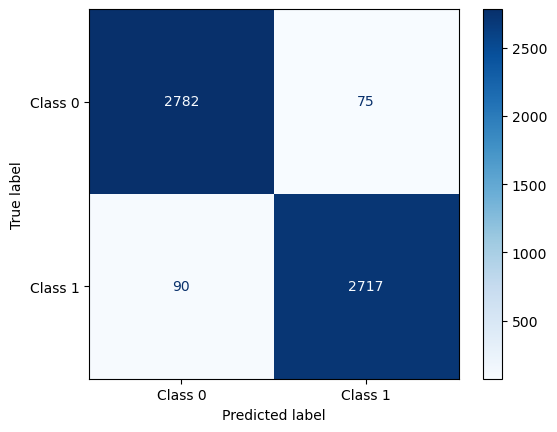

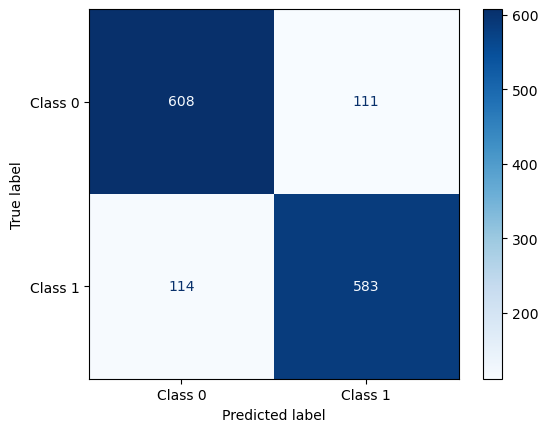

In [86]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_tr_oh, y_tr_oh)

# Make predictions
y_train_pred_svm_oh = svm_model.predict(X_tr_oh)
y_test_pred_svm_oh = svm_model.predict(X_te_oh)

# Evaluate the model
train_report_svm = get_classification_report(y_tr_oh, y_train_pred_svm_oh)
test_report_svm = get_classification_report(y_te_oh, y_test_pred_svm_oh)

print("Train Classification Report for SVM on :\n", train_report_svm)
print("Test Classification Report for SVM:\n", test_report_svm)
plot_confusion_matrix(
    y_tr_oh,
    y_train_pred_svm_oh,
    ["Class 0", "Class 1"],
    title="Train Confusion Matrix",
)
plot_confusion_matrix(
    y_te_oh,
    y_test_pred_svm_oh,
    ["Class 0", "Class 1"],
    title="Train Confusion Matrix",
)

NOW WE USE XGBOOST